In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Logistic regression** (classification)

[DeepLearningAI: Neural Networks and Deep Learning, 7-24](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0)

Goal: to find a (linear) formula for classification of points $x=[x_1,x_2,...,x_n]$

Coefficients for the formula are determined by data by minimizing a cost function.

2 classes: Binary classification

3,4,5... classes: Multiclass classification

## **2 variables, 2 classes**



Given: datapoints
$x^{(i)}=[x^{(i)}_1,x^{(i)}_2]$
 and their classes
 $y^{(i)}=0$ or $1$, $\quad i=1,2,\dots ,m$

 Goal: to find coefficients $w_1,w_2$ and $b$ such that points on different classes are separated by a line (**decision boundary**)


$$
w_1x_1+w_2x_2+b= 0
$$

as well as possible

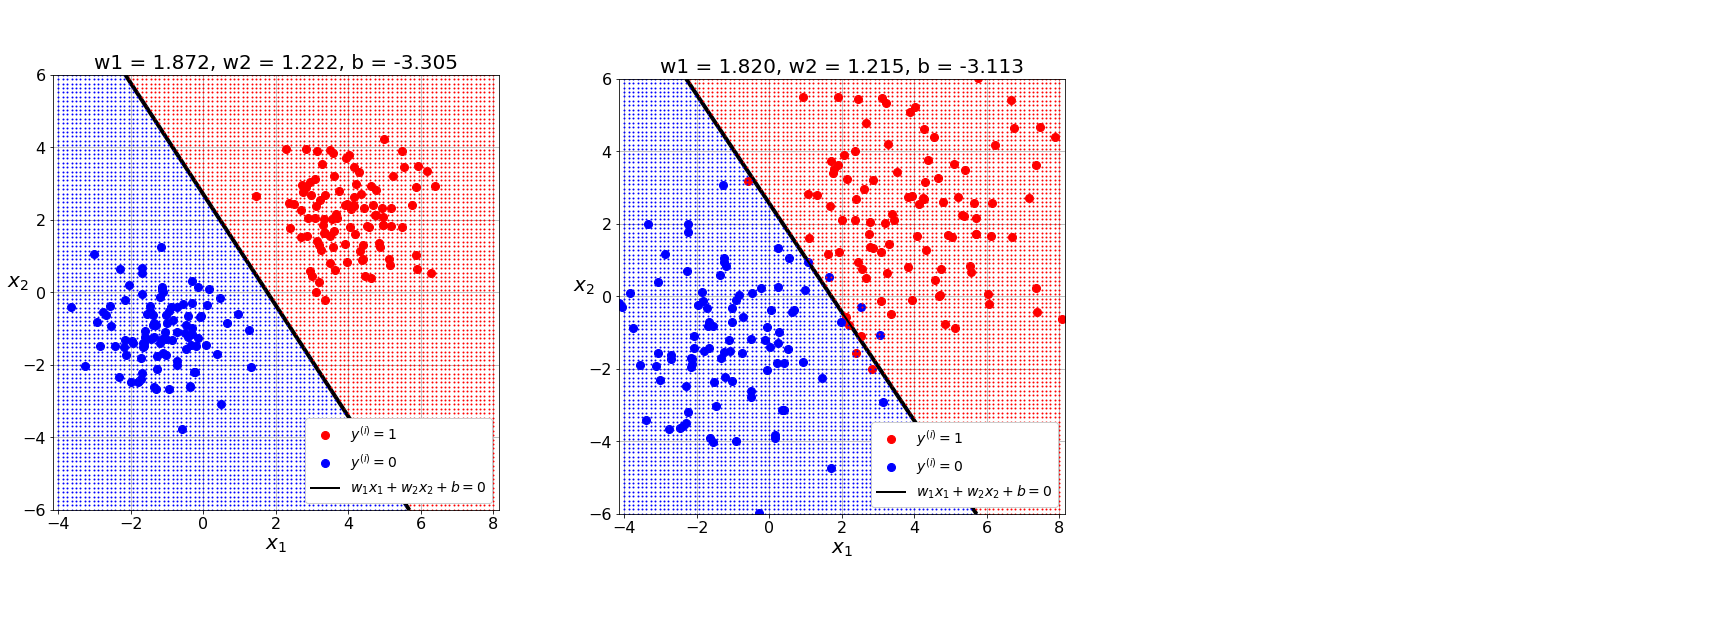

Classification of points  $x=[x_1,x_2]$:

If
$
z=w_1x_1+w_2x_2+b>  0
$
i.e the point is on the "positive side" of the line, then  it belongs to the class $y=1$



If
$
z=w_1x_1+w_2x_2+b<  0
$
i.e the point is on the  "negative side" of the line, then  it beleongs to the class $y=0$.

(Points on the line to either class)


**Geometry:** the line
$
w_1x_1+w_2x_2+b=0
$
 is perpendicular to the vector $w=[w_1,w_2]$ and goes through the point

$$
P=-\,\frac{b}{\|w\|}\ast \left[\frac{w_1}{\|w\|},\frac{w_2}{\|w\|}\right]
$$

where $\|w\|=\sqrt{w_1^2+w_2^2}$ is the length of  $w$


i.e the distance from the origin $O=[0,0]$ to $P$ is $|b|/\|w\|$

and the direction of  $OP$ is

$$\left\{\begin{array}{rl}-w&, \textrm{ if }b>0\\
w&, \textrm{ if }b<0\end{array}\right.$$







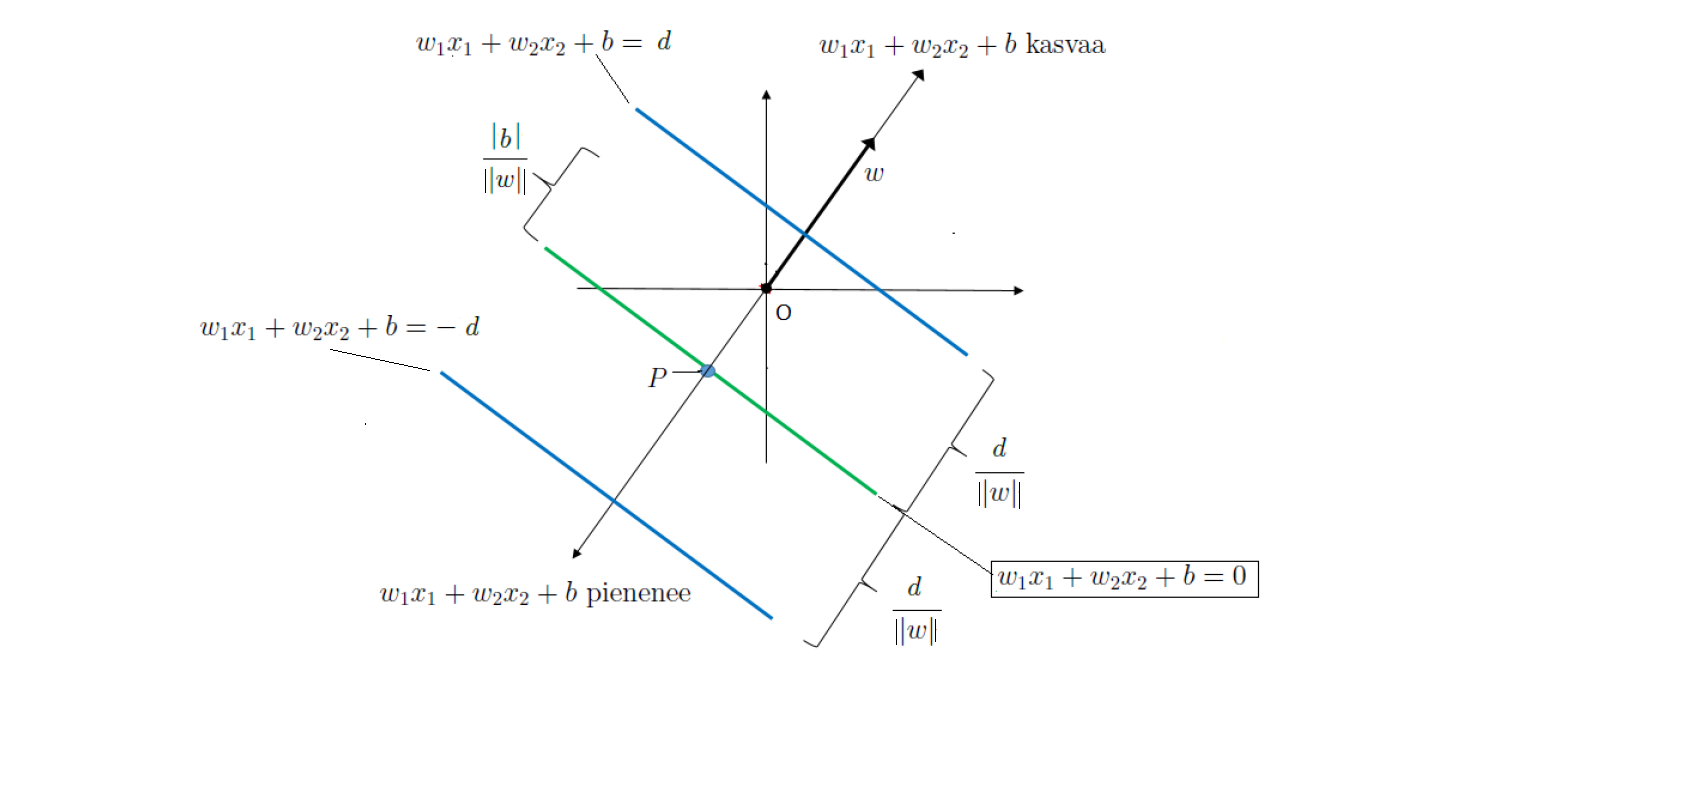

$z=w_1x_1+w_2x_2+b>0$, when the point $x=[x_1,x_2]$ is on the  $w$-side of the line and $z$ increases (kasvaa), when $x$ moves away from the line to the direction of $w$

$$
$$




$z=w_1x_1+w_2x_2+b<0$, when the point $x=[x_1,x_2]$ is on the
 $-w$-side of the line  puolella $z$ decreases (pienenee), when $x$ moves away from the line to the direction of $-w$


$$
$$

Distance between the lines $w_1x_1+w_2x_2+b=\pm d,\,d>0,$ and the line $w_1x_1+w_2x_2+b=0$ is $d/\|w\|$



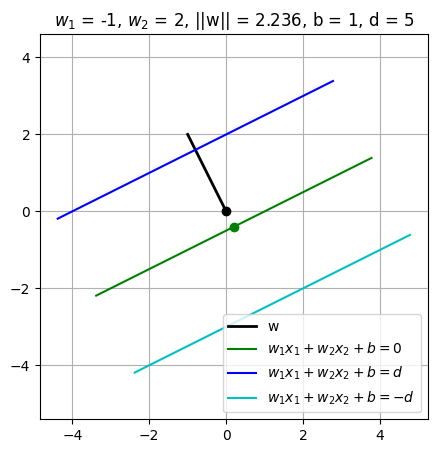

In [ ]:
#lines w1*x1+w2*x2+b=0, w1*x1+w2*x2+b=d,  w1*x1+w2*x2+b=-d
w1=-1
w2=2
b=1
d=5

nw=np.sqrt(w1**2+w2**2) #||w||

#point P on the line  w1*x1+w2*x2+b=0
px1=-b/nw*w1/nw
px2=-b/nw*w2/nw
sk=np.arctan2(w2,w1) #polar angle of w
L=4 #length of the line = 2L
#endpoints of the line
p1x1=px1+L*np.cos(sk+np.pi/2)
p1x2=px2+L*np.sin(sk+np.pi/2)
p2x1=px1+L*np.cos(sk-np.pi/2)
p2x2=px2+L*np.sin(sk-np.pi/2)

#point Q on the line  w1*x1+w2*x2+b=d i.e w1*x1+w2*x2+b-d=0
qx1=-(b-d)/nw*w1/nw
qx2=-(b-d)/nw*w2/nw
#endpoints of the line
q1x1=qx1+L*np.cos(sk+np.pi/2)
q1x2=qx2+L*np.sin(sk+np.pi/2)
q2x1=qx1+L*np.cos(sk-np.pi/2)
q2x2=qx2+L*np.sin(sk-np.pi/2)

#point R on the line w1*x1+w2*x2+b=-d i.e w1*x1+w2*x2+b+d=0
rx1=-(b+d)/nw*w1/nw
rx2=-(b+d)/nw*w2/nw
#endpoints of the line
r1x1=rx1+L*np.cos(sk+np.pi/2)
r1x2=rx2+L*np.sin(sk+np.pi/2)
r2x1=rx1+L*np.cos(sk-np.pi/2)
r2x2=rx2+L*np.sin(sk-np.pi/2)


plt.figure(figsize=(5,5))
plt.plot([0,w1],[0,w2],'k',linewidth=2,label='w')
plt.plot(0,0,'ko')
plt.plot([p1x1,p2x1],[p1x2,p2x2],'g',label='$w_1x_1+w_2x_2+b=0$')
plt.plot(px1,px2,'go')
plt.plot([q1x1,q2x1],[q1x2,q2x2],'b',label='$w_1x_1+w_2x_2+b=d$')
plt.plot([r1x1,r2x1],[r1x2,r2x2],'c',label='$w_1x_1+w_2x_2+b=-d$')
plt.grid()
plt.axis('equal')
plt.legend(fontsize=10,loc='best')
plt.title('$w_1$ = '+str(w1)+', $w_2$ = '+str(w2)+', ||w|| = {:.3f}'.format(nw)+', b = '+str(b)+', d = '+str(d))
plt.show()

The coefficients $w_1,w_2$ and $b$ are determined by the data points such that the points on the class 1 are as far as possible from the line in the direction of  $w$ and the points on the class 0 in the direction of $-w$,
i.e such that

$$
$$

$$z^{(i)} = w_1x^{(i)}_1+w_2x^{(i)}_2+b\quad  \textrm{ is }\quad \left\{\begin{array}{l}
\textrm{large positive, if } y^{(i)}=1  \\
 \textrm{large negative, if } y^{(i)}=0 \end{array}
\right.$$

i.e such that

$$
  a^{(i)}=\sigma(z^{(i)})=\frac{1}{1+\exp(-z^{(i)})}
	\approx \left\{
	\begin{array}{l}
	1,\textrm{ if } y^{(i)}=1\\
	0,\textrm{ if } y^{(i)}=0\\
	\end{array}\right.
$$

$$
\begin{array}{l}\\\end{array}
$$

where $\exp(-z)=e^{-z}$, $e\approx 2.718...$, is the exponential function and

$$
\sigma(z)=\frac{1}{1+\exp(-z)}
$$
is the so-called   **sigmoid**-function


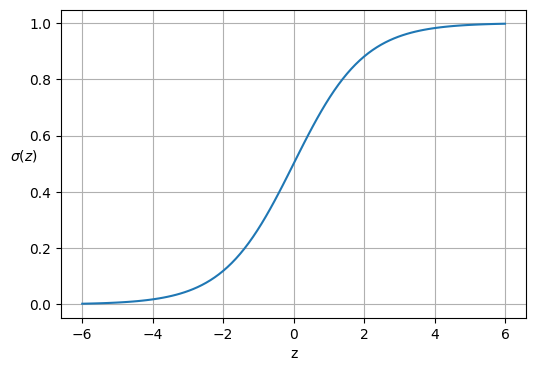

In [5]:
#sigmoid
z=np.linspace(-6,6,100)
s=1/(1+np.exp(-z))

plt.figure(figsize=(6,4))
plt.plot(z,s)
plt.grid()
plt.xlabel('z')
plt.ylabel(r'$\sigma(z)$',rotation=0)
plt.show()

Interpretation: point $x=[x_1,x_2]$
belongs

to the class 1 with probability
$a=\sigma(z)$

to the class 0 with probability $1-a$

where  $z=w_1x_1+w_2x_2+b$

Cost of the data point $x^{(i)}$
$$\begin{array}{rl}
C^{(i)}&=  \left\{\begin{array}{l}
-\log(a^{(i)}), \textrm{ if }y^{(i)}=1\\\\
-\log(1-a^{(i)}), \textrm{ if }y^{(i)}=0
\end{array}
\right. \\\\
&=-y^{(i)}\log(a^{(i)})-(1-y^{(i)})\log(1-a^{(i)})
\end{array}
$$


where $\log(...)$ is the natural logarithm.


$$
\begin{array}{l}\\
\end{array}
$$


If $y^{(i)}=1$, then
$$C^{(i)}=-\log(a^{(i)})=
\left\{
\begin{array}{rl}
\approx 0,&\textrm{ if }a^{(i)}\approx 1\\
\textrm{large},&\textrm{  if } a^{(i)}\approx 0
\end{array}\right.
$$

If $y^{(i)}=0$,  then
$$C^{(i)}=-\log(1-a^{(i)}) =
\left\{
\begin{array}{rl}
\approx 0,&\textrm{ if }a^{(i)}\approx 0\\
\textrm{large},&\textrm{ if } a^{(i)}\approx 1
\end{array}\right.
$$


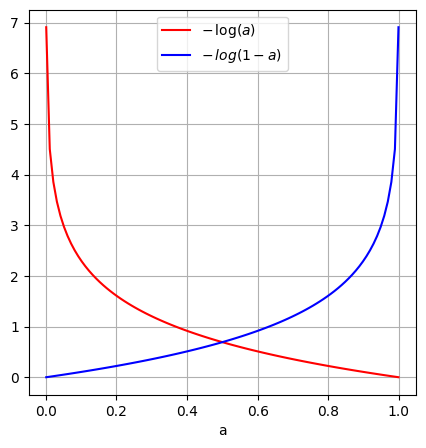

In [6]:
#graphs of -log(ai) and -log(1-ai) for ai=0...1
a=np.linspace(0.001,0.999,100)
C1=-np.log(a)
C0=-np.log(1-a)
plt.figure(figsize=(5,5))
plt.plot(a,C1,'r',label='$- \,\log(a)$')
plt.plot(a,C0,'b',label='$- \,log(1-a)$')
plt.grid()
plt.xlabel('a')
plt.legend()
plt.show()

Cost function (**binary cross-entropy**)

$$
C=\displaystyle{\,-\,\frac{1}{m}  \,\sum_{i=1}^m C^{(i)}}=\displaystyle{\,-\,\frac{1}{m}  \,\sum_{i=1}^m y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})}$$


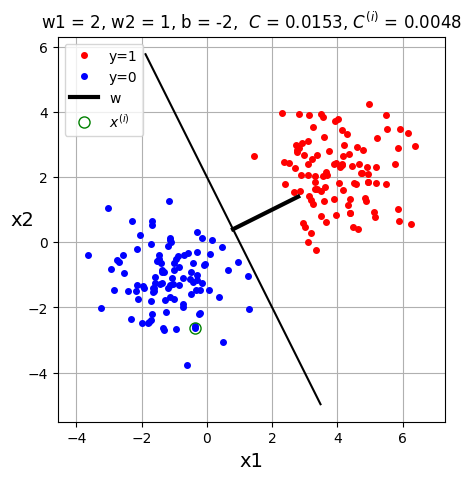

In [15]:
#create datapoints and their classes
k=100
m=2*k #number of datapoints
P1=np.array([4,2])
P2=np.array([-1,-1])
r=1
np.random.seed(0)
xpun=P1+np.random.normal(0,r,(k,2)) #class y=1 (pun=punainen=red)
xsin=P2+r*np.random.normal(0,r,(k,2)) #class y=0 (sin=sininen=blue)
x=np.vstack((xpun,xsin)) #(m,2)-matrix, points as rows

x1=x[:,0]
x2=x[:,1]

ypun=np.ones(k)
ysin=np.zeros(k)
y=np.hstack((ypun,ysin)) #classes

#line w1*x1+w2*x2+b=0
w1=2
w2=1
b=-2

#note: a line through point A=[Ax1,Ax2], perpendicular to w=[w1,w2]
#w1*(x1-Ax1)+w2*(x2-Ax2)=0 -> w1*x1+w2*x2-(w1*Ax1+w2*Ax2)=0

#Ax1=1
#Ax2=0
#b=-(w1*Ax1+w2*Ax2)

nw=np.sqrt(w1**2+w2**2) #||w||
#point P on the line
px1=-b/nw*w1/nw
px2=-b/nw*w2/nw

sk=np.arctan2(w2,w1) #polar angle of w
L=6 #length of the line = 2L
#enpoints of the line
p1x1=px1+L*np.cos(sk+np.pi/2)
p1x2=px2+L*np.sin(sk+np.pi/2)
p2x1=px1+L*np.cos(sk-np.pi/2)
p2x2=px2+L*np.sin(sk-np.pi/2)

#costs of the datapoints
z=w1*x1+w2*x2+b
a=1/(1+np.exp(-z))
Ci=-y*np.log(a+1e-10)-(1-y)*np.log(1-a+1e-10)#y=1->log(a), y=0->log(1-a)
#1e-10 not to have log(0)

#value of the cost-function
C=1/m*np.sum(Ci)
i=102 #number of the datapoint shown in the picture

plt.figure(figsize=(5,5))
plt.plot(xpun[:,0],xpun[:,1],'r.',label='y=1',markersize=8)
plt.plot(xsin[:,0],xsin[:,1],'b.',label='y=0',markersize=8)
plt.plot([p1x1,p2x1],[p1x2,p2x2],'k')
plt.plot([px1,px1+w1],[px2,px2+w2],'k',linewidth=3,label='w')
plt.plot(x[i,0],x[i,1],'go',markersize=8,markerfacecolor='None',label=r'$x^{(i)}$')
plt.grid()
plt.axis('equal')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14,rotation=0)
ci='{:.4f}'.format(Ci[i])
plt.title('w1 = '+str(w1)+', w2 = '+str(w2)+', b = '+str(b)+',  $C$ = {:.4f}'.format(C)+r', $C^{(i)}$ = '+str(ci))
plt.legend()
plt.show()

**Gradient descent:** choose initial values for  $w_1,w_2$ and $b$ and update as follows:

$$
$$

$$
\begin{array}{l}
\displaystyle{w_j=w_j-\alpha\cdot \frac{\partial C}{\partial w_j},\quad j=1,2}\\\\
\displaystyle{b=b-\alpha\cdot \frac{\partial C}{\partial b}}
\end{array}
$$







where $\alpha>0$ is the learning rate
and partial derivatives

$$\begin{array}{l}
\displaystyle{\frac{\partial C}{\partial w_j}=\frac{1}{m} \,\sum_{i=1}^m  (a^{(i)}-y^{(i)}) x^{(i)}_j},\quad j=1,2\\\\
\displaystyle{\frac{\partial C}{\partial b}=\frac{1}{m} \,\sum_{i=1}^m  (a^{(i)}-y^{(i)})}
\end{array}
$$

In [11]:
#gradient descent
N=1000 #number of updates
#initial values
w1=np.random.normal(0,0.1)
w2=np.random.normal(0,0.1)
b=np.random.normal(0,0.1)
#learning rate
alfa=2
#collect the updates
C=np.zeros(N)
W1=np.zeros(N)
W2=np.zeros(N)
B=np.zeros(N)


for k in range(N):
    z=w1*x1+w2*x2+b
    a=1/(1+np.exp(-z))
    Ci=-y*np.log(a+1e-10)-(1-y)*np.log(1-a+1e-10) #y=1->log(a), y=0->log(1-a)
    #1e-10 not to have log(0)

    #cost
    C[k]=1/m*np.sum(Ci)

    #partial derivavtives
    dw1=1/m*np.sum((a-y)*x1)
    dw2=1/m*np.sum((a-y)*x2)
    db=1/m*np.sum(a-y)

    #update
    w1=w1-alfa*dw1
    w2=w2-alfa*dw2
    b=b-alfa*db

    W1[k]=w1
    W2[k]=w2
    B[k]=b



print(C[N-1])
print(w1)
print(w2)
print(b)


0.0007773114408062996
3.0406754768660784
3.0703930453326427
-4.74535181743356


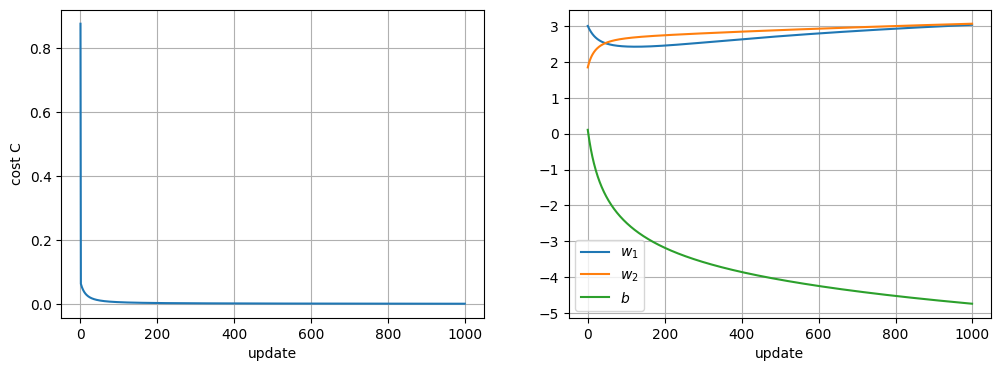

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(C)
plt.grid()
plt.xlabel('update')
plt.ylabel('cost C')

plt.subplot(1,2,2)
plt.plot(W1,label='$w_1$')
plt.plot(W2,label='$w_2$')
plt.plot(B,label='$b$')
plt.grid()
plt.xlabel('update')
plt.legend()
plt.show()

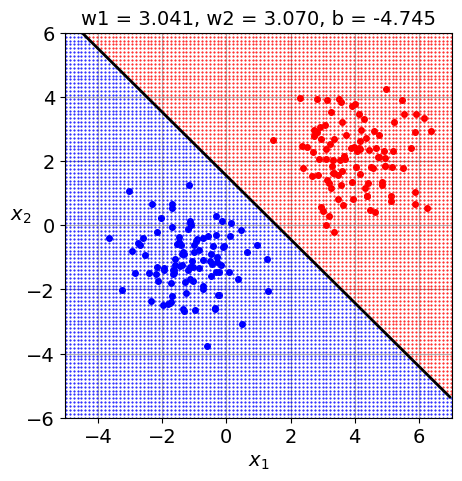

In [13]:
#the line w1*x1+w2*x2+b=0
#and the corresponding classification for the 2D-points

#NxN grid-points
N=100
xx1=np.linspace(-5,7,N)
xx2=np.linspace(-6,6,N)
X1,X2=np.meshgrid(xx1,xx2)#x1x2-pairs, NxN-matrices

Z=w1*X1+w2*X2+b #corresponding values of z, NxN-matrix

#class 1 grid-points
X1pun=X1[Z>=0]
X2pun=X2[Z>=0]
#class 0 grid-points
X1sin=X1[Z<0]
X2sin=X2[Z<0]

plt.figure(figsize=(5,5))
plt.plot(xpun[:,0],xpun[:,1],'ro',label='$y^{(i)}=1$',markersize=4)
plt.plot(xsin[:,0],xsin[:,1],'bo',label='$y^{(i)}=0$',markersize=4)
plt.plot(X1pun,X2pun,'r.',markersize=1)
plt.plot(X1sin,X2sin,'b.',markersize=1)
plt.contour(X1,X2,Z,levels=[0],colors=['k'],linewidths=[2]) #suora Z=0
plt.grid()
plt.axis('equal')
plt.title('w1 = {:.3f}'.format(w1)+', w2 = {:.3f}'.format(w2)+
          ', b = {:.3f}'.format(b),fontsize=14)
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Problem: the cost can be made arbitrarily small by using any line that separates the two classes even if the line isn't "geometrically the best".

If $k>0$, then

$$
w_1x_1+w_2x_2+b=0 \quad \textrm{and}\quad  k w_1x_1+k w_2x_2+k b=0  
$$

are the same line and if it separates the classes i.e

$$
$$

$$\begin{array}{l}
z^{(i)}=w_1x_1+w_2x_2+b>0,\textrm{ when } y^{(i)}=1\\\\
z^{(i)}=w_1x_1+w_2x_2+b<0,\textrm{ when } y^{(i)}=0\end{array}
$$

$$
$$


and if $z^{(i)}\to k\,z^{(i)}$, then

$$
a^{(i)}= \frac{1}{1+\exp(-k\,z^{(i)})}\to
\left\{
\begin{array}{l}
1,\textrm{ when }y^{(i)}=1\\
0,\textrm{ when }y^{(i)}=0
\end{array}\right.
$$



 as $k$ increases, i.e the cost $C\to 0$.



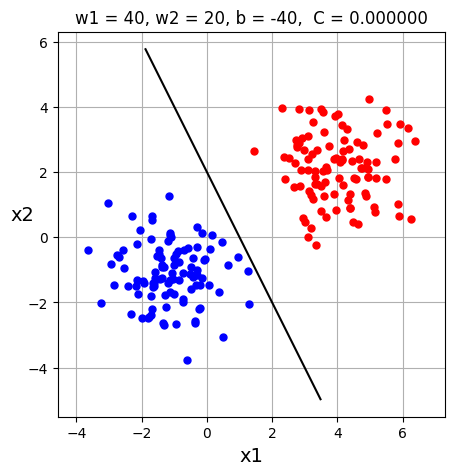

In [14]:
#line w1*x1+w2*x2+b=0
w1=2
w2=1
b=-2

#the line though point A=[Ax1,Ax2], perpendicular to  w=[w1,w2]
#w1*(x1-Ax1)+w2*(x2-Ax2)=0 -> w1*x1+w2*x2-(w1*Ax1+w2*Ax2)=0

#Ax1=1
#Ax2=0
#b=-(w1*Ax1+w2*Ax2)

k=20
w1*=k
w2*=k
b*=k

nw=np.sqrt(w1**2+w2**2) #||w||
#point P on the line
px1=-b/nw*w1/nw
px2=-b/nw*w2/nw
sk=np.arctan2(w2,w1) #polar angle of w
L=6 #length of the line = 2L
#endpoints of the line
p1x1=px1+L*np.cos(sk+np.pi/2)
p1x2=px2+L*np.sin(sk+np.pi/2)
p2x1=px1+L*np.cos(sk-np.pi/2)
p2x2=px2+L*np.sin(sk-np.pi/2)
#cotss of datapoints

z=w1*x1+w2*x2+b
a=1/(1+np.exp(-z))
Ci=-y*np.log(a+1e-10)-(1-y)*np.log(1-a+1e-10)#y=1->log(a), y=0->log(1-a)
#1e-10 not to have log(0)

#cost
C=1/m*np.sum(Ci)

plt.figure(figsize=(5,5))
plt.plot(xpun[:,0],xpun[:,1],'r.',label='y=1',markersize=10)
plt.plot(xsin[:,0],xsin[:,1],'b.',label='y=0',markersize=10)
plt.plot([p1x1,p2x1],[p1x2,p2x2],'k')
plt.grid()
plt.axis('equal')
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14,rotation=0)
plt.title('w1 = '+str(w1)+', w2 = '+str(w2)+', b = '+str(b)+',  C = {:5f}'.format(C))
plt.show()

Solution: **regularized** cost

$$\begin{array}{rl}
C=&\displaystyle{-\,\frac{1}{m}  \,\sum_{i=1}^m \log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})}
+\,\displaystyle{\frac{1}{2m}\left(w_1^2+w_2^2\right)}
\end{array}
$$

that penalizes for large values of coefficients $w_1$ and $w_2$.


Partial derivatives
$$\begin{array}{l}
\displaystyle{\frac{\partial C}{\partial w_j}=\frac{1}{m} \,\sum_{i=1}^m  (a^{(i)}-y^{(i)}) x^{(i)}_j}+\frac{1}{m}\,w_j,\quad j=1,2\\\\
\displaystyle{\frac{\partial C}{\partial b}=\frac{1}{m} \,\sum_{i=1}^m  (a^{(i)}-y^{(i)})}
\end{array}
$$

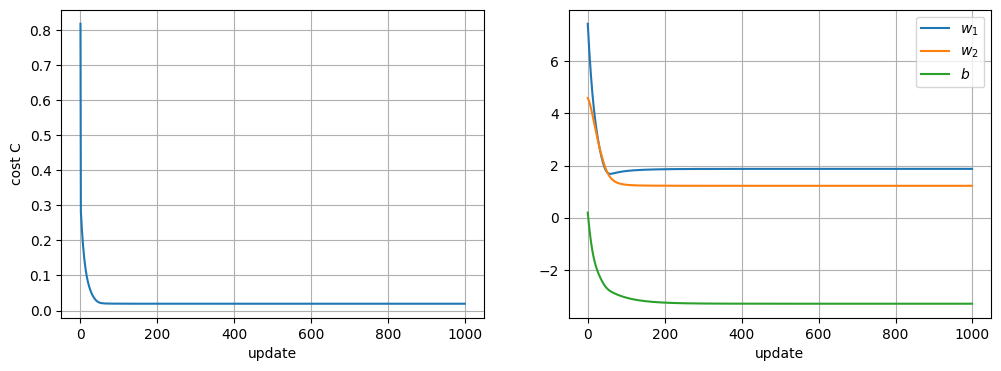

In [52]:
#gradient descent
N=1000 #number of updates
#initial values
w1=np.random.normal(0,0.1)
w2=np.random.normal(0,0.1)
b=0
#learning rate
alfa=5
#collect the updates
C=np.zeros(N)
W1=np.zeros(N)
W2=np.zeros(N)
B=np.zeros(N)


for k in range(N):
    z=w1*x1+w2*x2+b
    a=1/(1+np.exp(-z))
    Ci=-y*np.log(a+1e-10)-(1-y)*np.log(1-a+1e-10)#y=1->log(a), y=0->log(1-a)
    #1e-10 not to have log(0)

    #cost
    C[k]=1/m*np.sum(Ci)+1/(2*m)*(w1**2+w2**2)

    #partial derivatives
    dw1=1/m*np.sum((a-y)*x1)+1/m*w1
    dw2=1/m*np.sum((a-y)*x2)+1/m*w2
    db=1/m*np.sum(a-y)

    #upadates
    w1=w1-alfa*dw1
    w2=w2-alfa*dw2
    b=b-alfa*db

    W1[k]=w1
    W2[k]=w2
    B[k]=b



plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(C)
plt.grid()
plt.xlabel('update')
plt.ylabel('cost C')

plt.subplot(1,2,2)
plt.plot(W1,label='$w_1$')
plt.plot(W2,label='$w_2$')
plt.plot(B,label='$b$')
plt.grid()
plt.xlabel('update')
plt.legend()
plt.show()

In [53]:
print(w1)
print(w2)
print(b)

1.8721661630715396
1.222011720458788
-3.3048967486380336


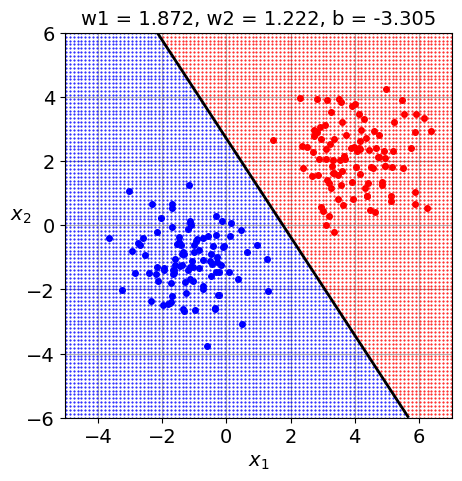

In [54]:
#the line w1*x1+w2*x2+b=0
#and the corresponding classification of 2D-points

#NxN grid-points
N=100
xx1=np.linspace(-5,7,N)
xx2=np.linspace(-6,6,N)
X1,X2=np.meshgrid(xx1,xx2)#x1x2-parit, NxN-matrices

Z=w1*X1+w2*X2+b #corresponding z-values, NxN

#class 1 grid-points
X1pun=X1[Z>=0]
X2pun=X2[Z>=0]
#class 0 grid-points
X1sin=X1[Z<0]
X2sin=X2[Z<0]

plt.figure(figsize=(5,5))
plt.plot(xpun[:,0],xpun[:,1],'ro',label='$y^{(i)}=1$',markersize=4)
plt.plot(xsin[:,0],xsin[:,1],'bo',label='$y^{(i)}=0$',markersize=4)
plt.plot(X1pun,X2pun,'r.',markersize=1)
plt.plot(X1sin,X2sin,'b.',markersize=1)
plt.contour(X1,X2,Z,levels=[0],colors=['k'],linewidths=[2]) #suora Z=0
plt.grid()
plt.axis('equal')
plt.title('w1 = {:.3f}'.format(w1)+', w2 = {:.3f}'.format(w2)+
          ', b = {:.3f}'.format(b),fontsize=14)
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

[scikit learn-library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [57]:
#datapoints as rows of  m x 2-matrix x
#classes in 1D-array y
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x,y) #minimizes the regularized cost
#model=LogisticRegression(penalty=None).fit(x,y) #minimizes the non-regularized cost
w=model.coef_ # [w1,w2], (1,2)-matrix
print(w)
w1=w[0,0]
w2=w[0,1]
b=model.intercept_ #(1,) 1D-array
print(b)
b=b[0]


[[1.86997681 1.21755112]]
[-3.30036343]


In [20]:
#predicted classes of the datapoints
ypred=model.predict(x)
#accuracy of the predistions
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,ypred)) #row = class, column = prediction

model.score(x,y) #percentage of correctly predicted points

[[100   0]
 [  0 100]]


1.0

In [21]:
#test point
xt=np.array([[-1,2]]) # (1,2)
ytpred=model.predict(xt) #class 0/1
print(ytpred)
tn_pred=model.predict_proba(xt) #probabilities 1-a,a (class 0,1), tn = todennäköisyys = probability in Finnish
print(tn_pred)

#using coefficients
z=np.sum(w*xt)+b
print(z)
a=1/(1+np.exp(-z))
print(a)

[0.]
[[0.93907421 0.06092579]]
-2.735237995997829
0.060925786840764204


# **$n$ variables, 2 classes**  






Given: datapoints
 $x^{(i)}=[x^{(i)}_1,x^{(i)}_2,\dots,x^{(i)}_n]$
  and their classes $y^{(i)}=0$ or 1, $i=1,2,\dots ,m$.


Goal: find coefficients
$w=[w_1,w_2,\dots,w_n]$ and $b$ such that points on different classes are separated by the plane


$$
w_1x_1+w_2x_2+\dots+w_nx_n+b=0
$$

as well as possible.

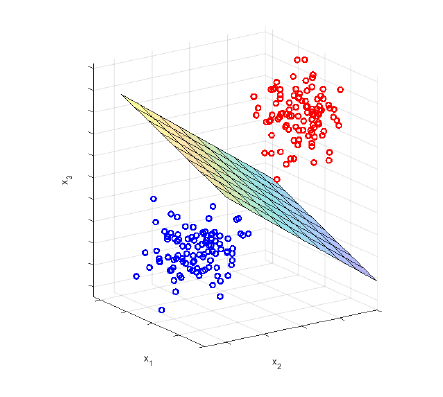

i.e such that

$$
z^{(i)}=w_1x^{(i)}_1+w_2x_2^{(i)}+\dots+w_nx^{(i)}_n+b
\quad \textrm{ is }\quad
\left\{\begin{array}{l}
\textrm{large positive, if } y^{(i)}=1 \\
 \textrm{large negative, if } y^{(i)}=0
\end{array}\right.$$

i.e

$$
  a^{(i)}=\frac{1}{1+\exp(-z^{(i)})}
	\approx \left\{
	\begin{array}{l}
	1,\textrm{ if } y^{(i)}=1\\
	0,\textrm{ if } y^{(i)}=0\\
	\end{array}\right.
$$

 $$
 $$

i.e  minimize  cost function  (**binary cross entropy**)
$$
$$

$$
C=\displaystyle{\,-\,\frac{1}{m}  \,\sum_{i=1}^m y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})}$$



Regularized cost

$$
C=\displaystyle{\,-\,\frac{1}{m}  \,\sum_{i=1}^m y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})}+\frac{1}{2m}(w_1^2+w_2^2+...+w_n^2)$$


Classification of point $x=[x_1,x_2,\dots,x_n]$:

if $z=w_1x_1+w_2x_2+\dots+w_nx_n+b> 0$, then class  $y=1$




 if
$z=w_1x_1+w_2x_2+\dots+w_nx_n+b< 0$
, then class $y=0$.




Interpretation: point $x$ belongs to class  1 with probability
$$a=\sigma(z)=\frac{1}{1+\exp(-z)}$$

and to class 0 with probability $1-a$



## ***4 variables, 2 classes***

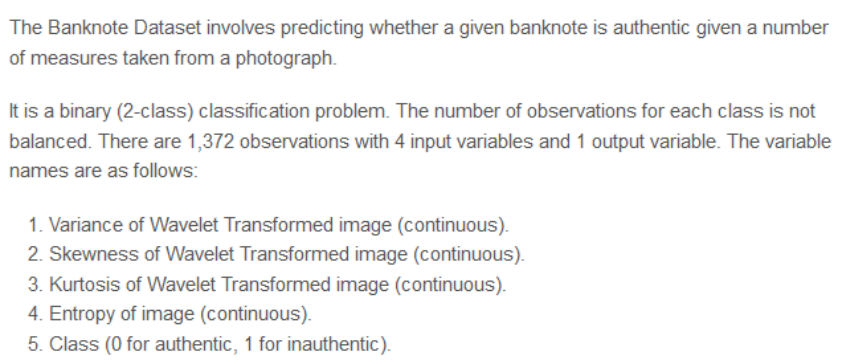

In [ ]:
#load banknote_authentication.txt to colab
data=np.loadtxt('/content/banknote_authentication.txt', delimiter=',')

In [ ]:
data[:5,:]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  0.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  0.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  0.     ],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ,  0.     ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ,  0.     ]])

In [ ]:
m=data.shape[0]
print(m)
X=data[:,:4] #coordinates
y=data[:,4] #classes
print(y[y==0].shape)
print(y[y==1].shape)

1372
(762,)
(610,)


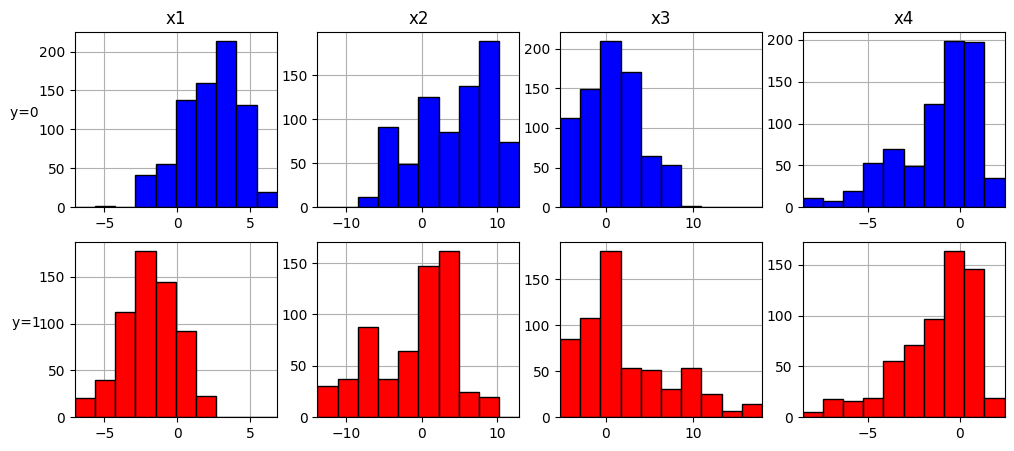

In [ ]:
#distribution of the values of the coordinates within classes
plt.figure(figsize=(12,5))
for k in range(4):
  mk=np.min(X[:,k])
  Mk=np.max(X[:,k])
  binsk=np.linspace(mk,Mk,11)
  plt.subplot(2,4,k+1)
  plt.hist(X[y==0,k],binsk,edgecolor='k',color='b',zorder=2)
  plt.xlim(mk,Mk)
  plt.title('x'+str(k+1))
  plt.grid()
  if k==0:
    plt.ylabel('y=0    ',rotation=0)
  plt.subplot(2,4,k+5)
  plt.hist(X[y==1,k],binsk,edgecolor='k',color='r',zorder=2)
  plt.grid()
  plt.xlim(mk,Mk)
  if k==0:
    plt.ylabel('y=1   ',rotation=0)

In [ ]:
#scaled coordinates, means = 0 and standard deviations = 1
mu=np.mean(X,axis=0)
s=np.std(X,axis=0)
Xhat=(X-mu)/s

In [ ]:
#scikit-learn-library
#scaled datapoints as rows of  m x 2-matrix Xhat
#classes in 1D-array y
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(Xhat,y) #minimizes regularized cost
#model=LogisticRegression(penalty=None).fit(Xhat,y) #minimizes non-regularized cost
w=model.coef_
b=model.intercept_

print(w)
print(b)


[[-4.92846897 -5.0408545  -4.61464127  0.23687598]]
[-1.56830481]


In [ ]:
#predicted classes of datapoints
ypred=model.predict(Xhat)
#accuracy of predictions
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,ypred)) #row = class 0/1, columns = prediction 0/1


[[739  23]
 [  3 607]]


In [ ]:
#test point
xt=np.array([[3.6 ,  8.6 , -2.8 , -0.4]]) #(1,4)
#scaling
xthat=(xt-mu)/s
ytpred=model.predict(xthat) #class 0/1
print(ytpred)
tn_pred=model.predict_proba(xthat) #probabilities 1-a,a (belongs class 0,1)
print(tn_pred,'\n')

#using coefficients
z=np.sum(w*xthat)+b
a=1/(1+np.exp(-z))
print(z)
print(a)

[0.]
[[9.99728656e-01 2.71344262e-04]] 

[-8.21185082]
[0.00027134]


# **2 variables, 3 classes**









Given: datapoints $x^{(i)}=[x_1^{(i)},x_2^{(i)}]$ and their classes $y^{(i)}=1,2,3, \quad  i=1,2,\dots m$

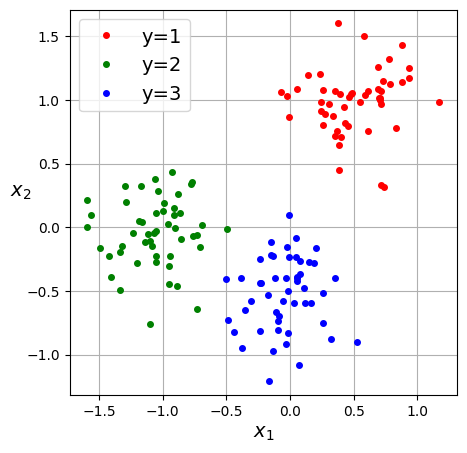

In [ ]:
k=50
m=3*k #number of datapoints

P1=np.array([0.5,1])
P2=np.array([-1,0])
P3=np.array([0,-0.5])
r=0.25
xpun=P1+np.random.normal(0,r,(k,2))
xvih=P2+np.random.normal(0,r,(k,2))
xsin=P3+np.random.normal(0,r,(k,2))
x=np.vstack((xpun,xvih,xsin))
ypun=np.ones(k)
yvih=2*np.ones(k)
ysin=3*np.ones(k)
y=np.hstack((ypun,yvih,ysin))

plt.figure(figsize=(5,5))
plt.plot(xpun[:,0],xpun[:,1],'r.',label='y=1',markersize=8)
plt.plot(xvih[:,0],xvih[:,1],'g.',label='y=2',markersize=8)
plt.plot(xsin[:,0],xsin[:,1],'b.',label='y=3',markersize=8)
plt.grid()
plt.legend(loc='best',fontsize=14)
plt.axis('equal')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2 $',fontsize=14,rotation=0)
plt.show()

Goal: to find coefficients
$w_{11},\dots,w_{23},\, b_1,b_2,b_3$
such that point $x=[x_1,x_2]$ belongs to class 1,2 or 3  according to which of the numbers

$$
\left\{
\begin{array}{l}
z_1=w_{11}x_1+w_{21}x_2+b_1\\
z_2=w_{12}x_1+w_{22}x_2+b_2\\
z_3=w_{13}x_1+w_{23}x_2+b_3
\end{array}
\right. \quad \textrm{ is largest}
$$


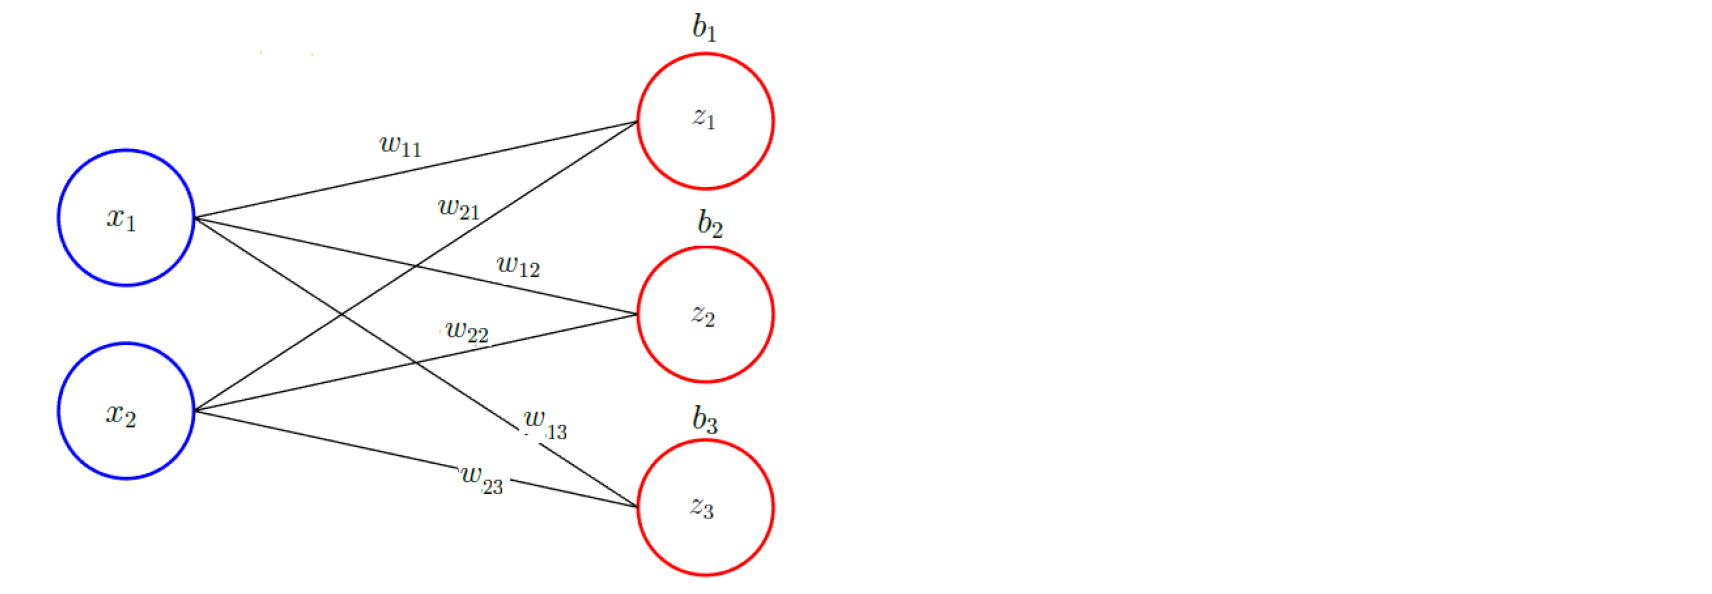

With matrices: (@ is matrix multiplication):
$$[z_1,z_2,z_3]=[x_1,x_2]@\left[
\begin{array}{ccc}
w_{11}&w_{12}&w_{13}\\
w_{21}&w_{22}&w_{23}\\
\end{array}
\right]+[b_1,b_2,b_3]
$$

Interpretation: point $x$ belongs to class $k=1,2,3$ with probability

$$
a_k=\frac{\exp(z_k)}{ \exp(z_1)+\exp(z_2)+\exp(z_3)}
$$



$$
\begin{array}{l}\\
\end{array}
$$



The numbers $a_1,a_2,a_3$ are called the **softmax** of numbers $z_1,z_2,z_3$.


Properties:

$$
a_1+a_2+a_3=1
$$




and if some of the numbers $z_k$ is much larger than the others, then
$a_k\approx 1$ and other $a_j\approx 0$.


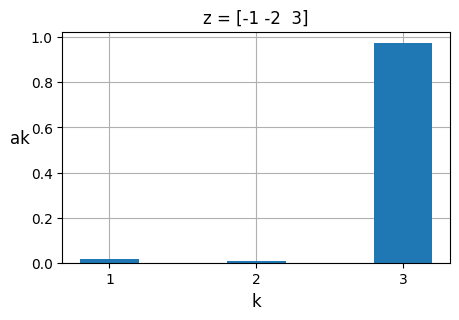

In [ ]:
#softmax
z=np.array([-1,-2,3])
a=np.exp(z)/np.sum(np.exp(z))
k=np.arange(1,len(z)+1)
plt.figure(figsize=(5,3))
plt.bar(k,a,width=0.4,zorder=2)#zorder=grid-lines behind the bars
plt.grid()
plt.xlabel('k',fontsize=12)
plt.ylabel('ak  ',rotation=0,fontsize=12)
plt.xticks(k)
plt.title('z = ' + str(z))
plt.show()

Determination of the coefficients $w_{jk}$ and $b_k$:

$$
$$


calculate for the datapoints $x^{(i)}=[x^{(i)}_1,x^{(i)}_2]$:

$$
$$

$$\begin{array}{l}
\displaystyle{z^{(i)}_k=w_{1k}x^{(i)}_1+w_{2k}x^{(i)}_2+b_k}\\\\
\displaystyle{a^{(i)}_k=\frac{\exp(z^{(i)}_k)}{ \exp(z^{(i)}_1)+\exp(z^{(i)}_2)+\exp(z^{(i)}_3)}}
\end{array},\quad k=1,2,3
$$

$$
$$


If the class $y^{(i)}=k$, then the cost

$$
C^{(i)}=-\log(a_k^{(i)}),\quad k=1,2,3
$$

idea:
$$
\begin{array}{l}
\textrm{if   $a^{(i)}_k\approx 1$, then  $C^{(i)}\approx 0$}\\\\   
\textrm{if $a^{(i)}_k\approx 0$, then    
$C^{(i)}$ is large}\\\\ %-\log(a_k^{(i)})\approx 0
\end{array}
$$


Cost function
 (**categorical cross entropy**)

$$
C=\frac{1}{m} \,\sum_{i=1}^m C^{(i)} $$



Regularized cost

$$
C=\frac{1}{m} \,\sum_{i=1}^m C^{(i)}+\frac{1}{2m}\sum_{j,k} (w_{jk})^2 $$


In [ ]:
from sklearn.linear_model import LogisticRegression
#datapoints [x1,x2] as rows of  matrix x
#classes 1,2,3 in 1D-array y
model=LogisticRegression().fit(x,y) #minimizes regularized cost
#model=LogisticRegression(penalty=None).fit(x,y) #minimizes non-regularized cost

w=model.coef_.T  #NOTE: transpose of the matrix given by sklearn !
b=model.intercept_

np.set_printoptions(precision=3)
print('w = '+str(w))
print('\n')

print('b = '+str(b))
print('\n')

ypred=model.predict(x) #predicted classes 1,2,3

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, ypred)) #row = class, column = prediction

w = [[ 1.802 -3.247  1.445]
 [ 2.464  0.177 -2.641]]


b = [-0.4   -0.613  1.013]


[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


In [ ]:
#test point
xt=np.array([[1,1]])
yt=model.predict(xt) #class
print(yt)
at=model.predict_proba(xt) #softmax
print(at)
print('\n')

#using coefficients
zt=xt@w+b #[z1,z2,z3], (1,3)
print(zt)
at2=np.exp(zt)/np.sum(np.exp(zt)) #softmax
print(at2)

[1.]
[[9.824e-01 5.169e-04 1.712e-02]]


[[ 3.867 -3.683 -0.183]]
[[9.824e-01 5.169e-04 1.712e-02]]


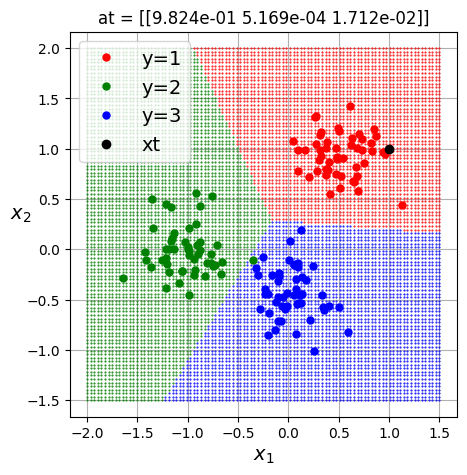

In [ ]:
#corresponding classification of 2D-points
x1=np.linspace(-2,1.5,100)
x2=np.linspace(-1.5,2,100)
X1,X2=np.meshgrid(x1,x2)
m1,n1=X1.shape
X1=X1.reshape(m1*n1,1)
X2=X2.reshape(m1*n1,1)
X=np.hstack((X1,X2))
Y=model.predict(X)

X1pun=X1[Y==1]
X2pun=X2[Y==1]
X1vih=X1[Y==2]
X2vih=X2[Y==2]
X1sin=X1[Y==3]
X2sin=X2[Y==3]


plt.figure(figsize=(5,5))

plt.plot(X1pun,X2pun,'r.',markersize=1)
plt.plot(X1vih,X2vih,'g.',markersize=1)
plt.plot(X1sin,X2sin,'b.',markersize=1)
plt.plot(xpun[:,0],xpun[:,1],'r.',label='y=1',markersize=10)
plt.plot(xvih[:,0],xvih[:,1],'g.',label='y=2',markersize=10)
plt.plot(xsin[:,0],xsin[:,1],'b.',label='y=3',markersize=10)
plt.plot(xt[0,0],xt[0,1],'ko',label='xt')
plt.grid()
plt.legend(loc='best',fontsize=14)
plt.axis('equal')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2 $',fontsize=14,rotation=0)
plt.title('at = '+str(at2))
plt.show()


**Note:**  the boundaries of the classes are line segments

Class 1  points  $x=[x_1,x_2]$ satisfy




$$\begin{array}{rl}
z_1>z_2 &
\leftrightarrow  w_{11}x_1+w_{21}x_2+b_1> w_{12}x_1+w_{22}x_2+b_2\\\\
&\leftrightarrow(w_{11}-w_{12})x_1+(w_{21}-w_{22})x_2+(b_1-b_2)> 0
\end{array}
$$



$$\begin{array}{rl}
&\\\\z_1>z_3 &
\leftrightarrow  w_{11}x_1+w_{21}x_2+b_1> w_{13}x_1+w_{23}x_2+b_3\\\\
&\leftrightarrow(w_{11}-w_{13})x_1+(w_{21}-w_{23})x_2+(b_1-b_3)> 0
\\\\&\end{array}
$$

i.e the boundaries of class 1 are the lines
$$
(w_{11}-w_{12})x_1+(w_{21}-w_{22})x_2+(b_1-b_2)= 0
$$
and
$$
(w_{11}-w_{13})x_1+(w_{21}-w_{23})x_2+(b_1-b_3)= 0
$$

perpendicular to vectors
$$[w_{11}-w_{12},w_{21}-w_{22}]\quad \textrm{and}\quad [w_{11}-w_{13},w_{21}-w_{23}]$$





Classes 2 and 3 similarly.

# **$n$ variables, $K$ classes**




Given: datapoints $x^{(i)}=[x^{(i)}_1,x^{(i)}_2,\dots,x^{(i)}_n]$ and their classes $y^{(i)}=1,2,...,K$

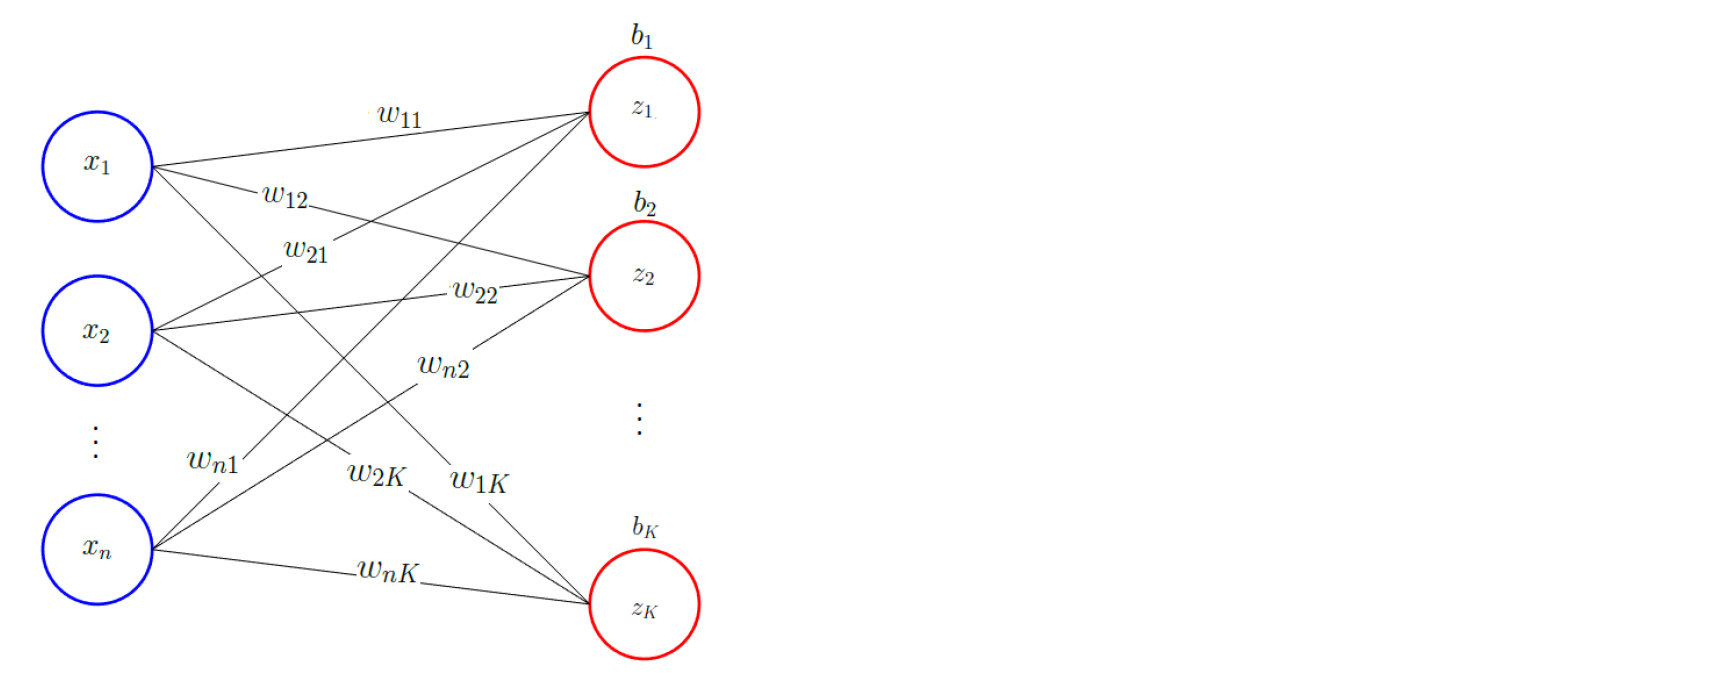

Coefficients

$$W=\left[
\begin{array}{cccc}
w_{11}&w_{12}&\dots&w_{1K}\\
w_{21}&w_{22}&\dots&w_{2K}\\
\vdots&\vdots&&\vdots\\
w_{n1}&w_{n2}&\dots&w_{nK}\\
\end{array}
\right]\quad \textrm{and}\quad
b=[b_1,b_2,\dots,b_K]
$$


$$
\begin{array}{l}\\\\
\end{array}
$$




Point $x=[x_1,x_2,\dots,x_n]$ belongs to $k=1,2,\dots,K$ according
 to which of the numbers

 $$
 $$

$$[z_1,z_2,\dots,z_K]=x@W+b$$

is largest.

$$
\begin{array}{l}\\\\
\end{array}
$$

Interpretation:  $x$ belongs to class $k=1,2,\dots,K$
with probability

$$
a_k=\frac{\exp(z_k)}{ \exp(z_1)+\exp(z_2)+\dots+\exp(z_K)}
$$




Cost: datapoint

$$x^{(i)}=[x^{(i)}_1,x^{(i)}_2,\dots,x^{(i)}_n],\,y^{(i)}=k$$

$$
$$



$$[z^{(i)}_1,z^{(i)}_2,\dots,z^{(i)}_K]=x^{(i)}@W+b$$

$$
$$

$$
\displaystyle{a^{(i)}_k=\frac{\exp(z^{(i)}_k)}{ \exp(z^{(i)}_1)+\exp(z^{(i)}_2)+\dots+\exp(z^{(i)}_K)}}
$$

$$
$$

$$
C^{(i)}=-\log(a^{(i)}_k)
$$

$$
\begin{array}{l}\\\\
\end{array}
$$

**Categorical cross entropy**

$$
C=\,\frac{1}{m} \,\sum_{i=1}^m C^{(i)}
$$


Regularized cost

$$
C=\,\frac{1}{m} \,\sum_{i=1}^m C^{(i)} +\frac{1}{2m}\sum_{j,k} (w_{j,k})^2
$$

## **4 variables, 3 classes**



[Iris flower data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) consists of 50 samples
from each of three species of Iris (Iris setosa, Iris
virginica and Iris versicolor).


Four features were
measured from each sample: the length and the
width of the sepals and petals, in centimeters.

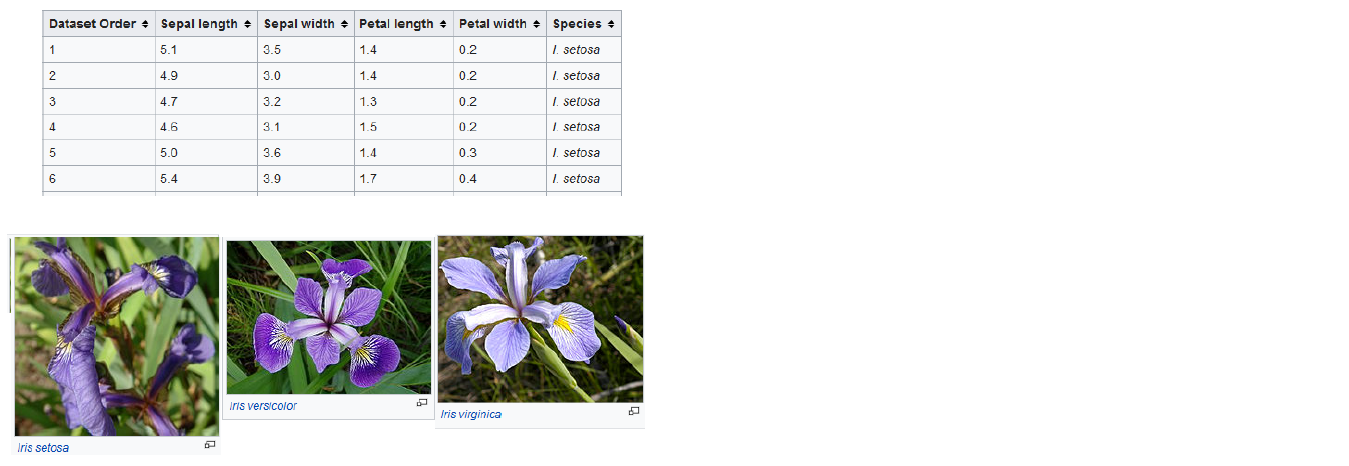


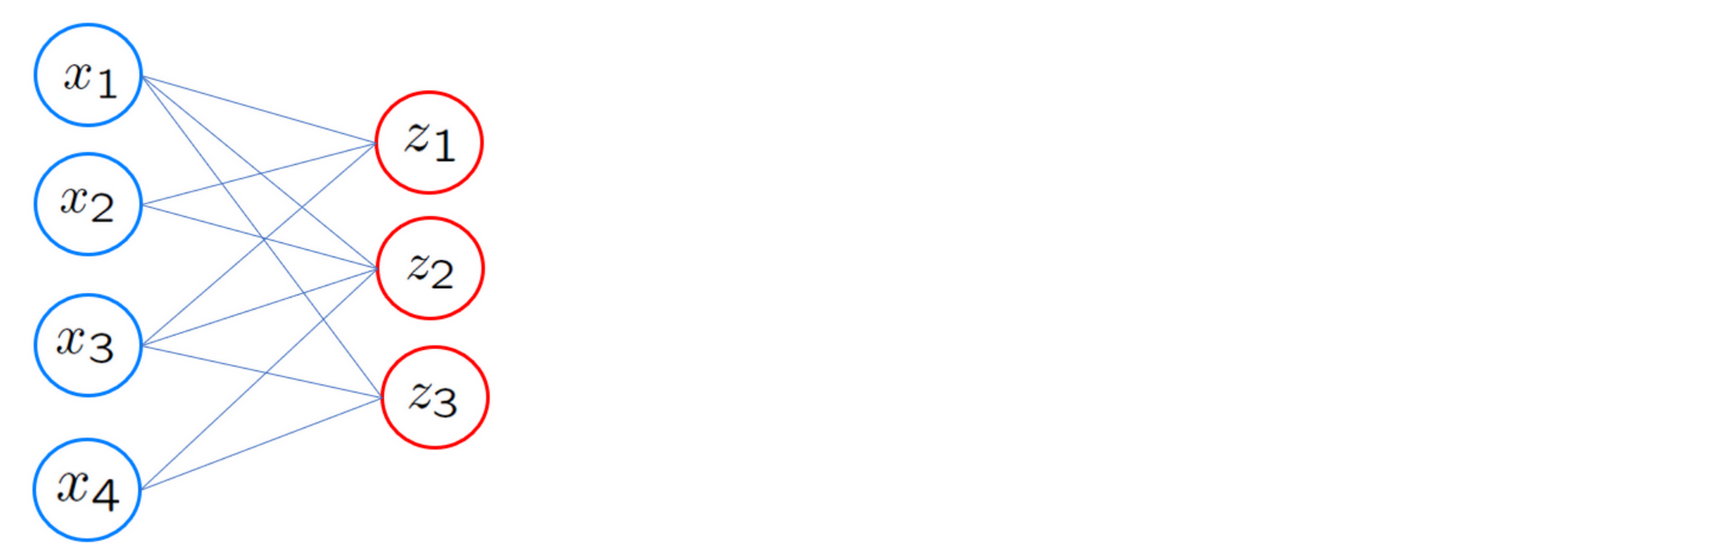

In [ ]:
from sklearn import datasets
X,y=datasets.load_iris(return_X_y=True)
#the coordinates are the rows of matrix X
#the classes 0,1,2 in the 1D-array y

In [ ]:
print(X.shape)
print(X[0:5,:])
print(y[0:5])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


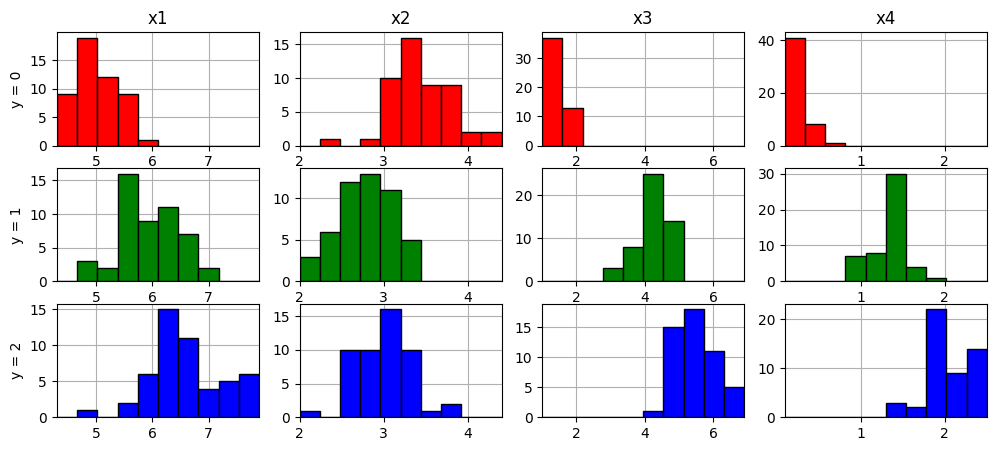

In [ ]:
#distribution of values of the coordinates within each class
plt.figure(figsize=(12,5))

for k in range(4):
  plt.subplot(3,4,k+1)
  mk=np.min(X[:,k])
  Mk=np.max(X[:,k])
  binsk=np.linspace(mk,Mk,11)
  plt.hist(X[y==0,k],binsk,edgecolor='k',color='r',zorder=2)
  plt.title('x'+str(k+1))
  plt.grid()
  plt.xlim(mk,Mk)
  if k==0:
    plt.ylabel('y = 0')
  plt.subplot(3,4,k+5)
  plt.hist(X[y==1,k],binsk,edgecolor='k',color='g',zorder=2)
  plt.grid()
  plt.xlim(mk,Mk)
  if k==0:
    plt.ylabel('y = 1')
  plt.subplot(3,4,k+9)
  plt.hist(X[y==2,k],binsk,edgecolor='k',color='b',zorder=2)
  plt.grid()
  plt.xlim(mk,Mk)
  if k==0:
    plt.ylabel('y = 2')

In [ ]:
#scaled coordinates, means = 0 and stds = 1
mu=np.mean(X,axis=0)
s=np.std(X,axis=0)
Xhat=(X-mu)/s


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(Xhat,y) #minimizes regularized cost
#model = LogisticRegression(penalty=None).fit(Xhat,y) #minimizes non-regularized cost

w=model.coef_.T #NOTE: transpose of the matrix given by sklearn !
print(w)
print('\n')
b=model.intercept_
print(b)


[[-1.07404149  0.58780051  0.48624098]
 [ 1.16006342 -0.36182377 -0.79823965]
 [-1.93062866 -0.36346274  2.2940914 ]
 [-1.81168873 -0.82619289  2.63788161]]


[-0.20531681  2.07486525 -1.86954844]


In [ ]:
from sklearn.metrics import confusion_matrix
ypred=model.predict(Xhat)
cm=confusion_matrix(y, ypred)
print(cm) #row = class, column = prediction

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


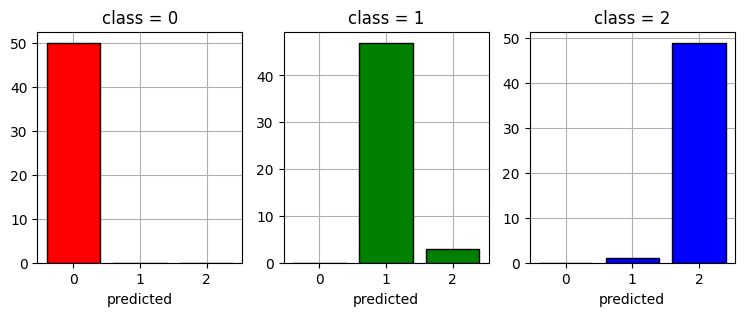

In [ ]:
#class vs. predicted class
colors=['r','g','b']
plt.figure(figsize=(9,3))
for k in range(3):
  plt.subplot(1,3,k+1)
  plt.bar([0,1,2],cm[k,:],color=colors[k],edgecolor='k',zorder=2)
  plt.grid()
  plt.xticks([0,1,2])
  plt.title('class = '+str(k))
  plt.xlabel('predicted')

In [ ]:
#test point
xt=np.array([[5.2,2.4,1.7,1.5]])
xthat=(xt-mu)/s
ytpred=model.predict(xthat)
print(ytpred)
atpred=model.predict_proba(xthat)
print(atpred,'\n')
#using coefficients
z=xthat@w+b
print(z)
a=np.exp(z)/np.sum(np.exp(z))
print(a)

[1]
[[0.13568256 0.85819255 0.00612489]] 

[[ 0.41781553  2.26232601 -2.68014154]]
[[0.13568256 0.85819255 0.00612489]]


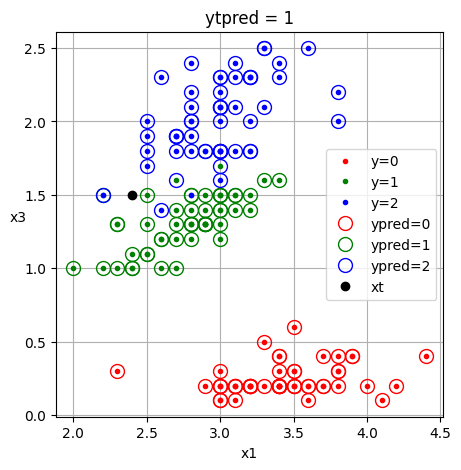

In [ ]:
#picture of the classification using coordinates xi and xj
i=1 #horizontal coordinate
j=3 #vertical coordinate

plt.figure(figsize=(5,5))
plt.plot(X[y==0,i],X[y==0,j],'r.',label='y=0')
plt.plot(X[y==1,i],X[y==1,j],'g.',label='y=1')
plt.plot(X[y==2,i],X[y==2,j],'b.',label='y=2')
plt.plot(X[ypred==0,i],X[ypred==0,j],'ro',markersize=10,fillstyle='none',label='ypred=0')
plt.plot(X[ypred==1,i],X[ypred==1,j],'go',markersize=10,fillstyle='none',label='ypred=1')
plt.plot(X[ypred==2,i],X[ypred==2,j],'bo',markersize=10,fillstyle='none',label='ypred=2')
plt.plot(xt[0,i],xt[0,j],'ko',label='xt')
plt.axis('equal')
plt.grid()
plt.xlabel('x'+str(i))
plt.ylabel('x'+str(j),rotation=0)
plt.legend()
plt.title('ytpred = '+str(ytpred[0]))
k=k+1

## **64 variables, 10 classes**




[Digits-data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits),
black and white 8x8 pictures of numbers 0-9, pixel values 0-16, 0 = black, 16 = white

In [58]:
from sklearn import datasets
X,y=datasets.load_digits(return_X_y=True)

In [59]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


$[1,2,\dots,64]\quad\leftrightarrow \quad
\left[
  \begin{array}{cccc}
  1&2&\dots&8\\
  9&10&\dots&16\\
  \vdots&\vdots&\ddots&\vdots\\
  57&58&\dots&64
  \end{array}
  \right]
$

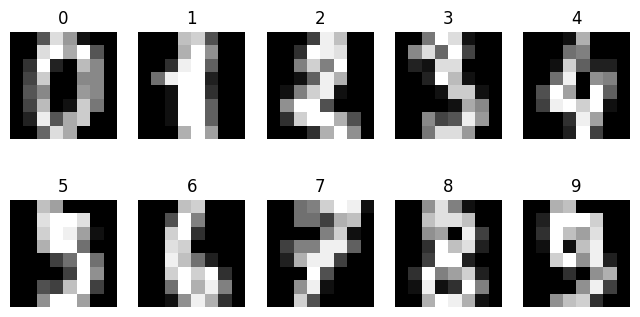

In [60]:
#example pictures
plt.figure(figsize=(8,4))
for k in range(10):
  xk=X[y==k,:] #pictures for number k
  plt.subplot(2,5,k+1)
  kuva=xk[0].reshape((8,8))
  plt.imshow(kuva,cmap='gray')
  plt.title(str(k))
  plt.axis('off')
plt.show()

[[ 0.  0.  4. 15. 12.  2.  0.  0.]
 [ 0.  0.  9. 16. 14.  2.  0.  0.]
 [ 0.  0. 12. 16. 15.  0.  0.  0.]
 [ 0.  0. 11. 16. 12.  1.  0.  0.]
 [ 0.  0.  9. 16. 14.  0.  0.  0.]
 [ 0.  0. 10. 16. 12.  0.  0.  0.]
 [ 0.  0.  9. 16. 14.  0.  0.  0.]
 [ 0.  0.  4. 12. 12.  0.  0.  0.]]


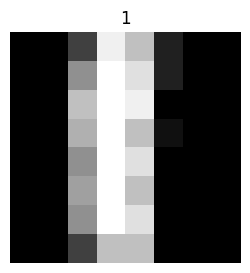

In [61]:
k=np.random.randint(0,1797)
kuva=X[k,:].reshape((8,8))
print(kuva)

plt.figure(figsize=(3,3))
plt.imshow(kuva,cmap=plt.cm.gray)
plt.title(str(y[k]))
plt.axis('off')
plt.show()

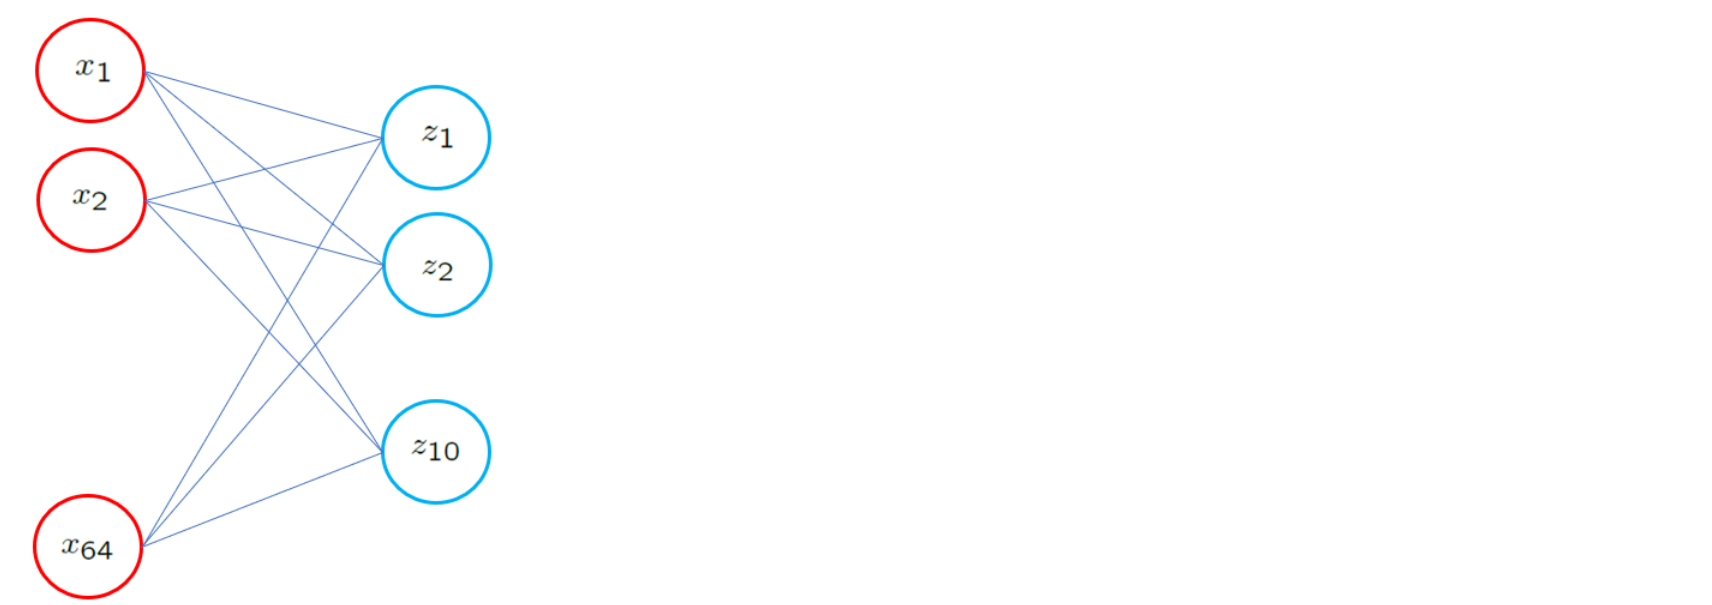

In [64]:
#scale pixel values to 0...1
Xhat=X/16.0

In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(Xhat,y)
w=model.coef_.T
print(w.shape)
b=model.intercept_
print(b.shape)


(64, 10)
(10,)


In [71]:
ypred=model.predict(Xhat) #predicted classes

from sklearn.metrics import confusion_matrix
confusion_matrix(y, ypred) #row = class 0,1,...9, column = prediction 0,1,...,9

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 178,   0,   0,   0,   0,   0,   0,   3,   1],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 182,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0, 177,   0,   0,   1,   2,   1],
       [  0,   0,   0,   0,   0, 179,   1,   0,   0,   2],
       [  0,   1,   0,   0,   0,   1, 178,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   0,   1],
       [  0,   6,   0,   0,   0,   1,   0,   0, 167,   0],
       [  0,   1,   0,   0,   0,   2,   0,   0,   1, 176]])

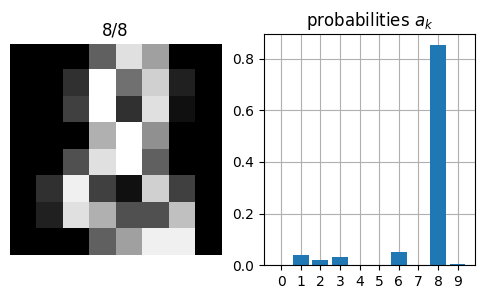

In [72]:
#test point
k=np.random.randint(0,1797)
xthat=Xhat[k,:].reshape((1,64))
yt_pred=model.predict(xthat)
at=model.predict_proba(xthat) #predicted probabilities, softmax

plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(xthat.reshape((8,8)),cmap='gray')
plt.title(str(yt_pred[0])+'/'+str(y[k]))
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(0,10),at[0,:],zorder=2)
plt.xticks(np.arange(0,10))
plt.title('probabilities $a_k$')
plt.grid()
plt.show()

In [73]:
#wrong predictions (väärin=wrong in Finnish)
vaarin=Xhat[y!=ypred,:]
yvaarin=y[y!=ypred]
mv=vaarin.shape[0]
mv

27

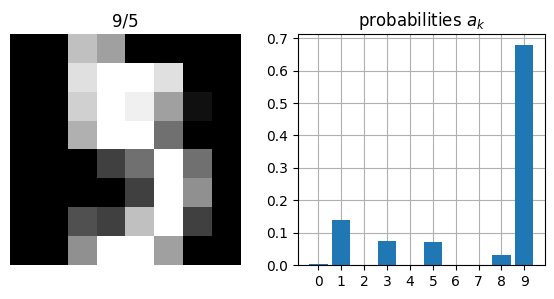

In [74]:
#one wrongly predicted picture
k=np.random.randint(0,mv)
xthat=vaarin[k,:].reshape((1,64))
yt_pred=model.predict(xthat)
at=model.predict_proba(xthat) #probabilities, softmax
plt.figure(figsize=(7,3))
plt.subplot(121)
plt.imshow(xthat.reshape((8,8)),cmap='gray')
plt.title(str(yt_pred[0])+'/'+str(yvaarin[k]))
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(0,10),at[0,:],zorder=2)
plt.grid()
plt.xticks(np.arange(0,10))
plt.title('probabilities $a_k$')
plt.show()